## API Funcional

In [29]:
from keras import layers
from keras import models
from keras import optimizers
from keras import metrics
from keras import losses
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

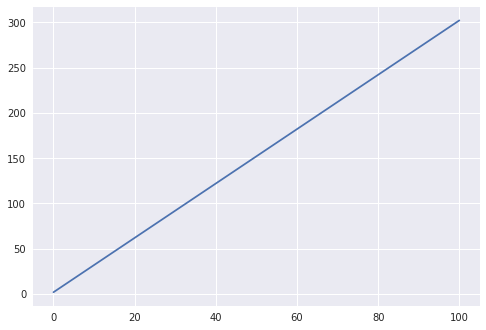

In [30]:
x_train = np.linspace(0, 100, 1000)
y_train = 3 * x_train + 2
x_test = np.linspace(101,111,)

plt.plot(x_train, y_train)

In [10]:
# Definido de forma secuencial
m = models.Sequential()
m.add(layers.Dense(512, input_shape=(1, ), activation='selu'))
m.add(layers.Dense(256, activation='selu'))
m.add(layers.Dense(512, activation='selu'))
m.add(layers.Dense(56, activation='selu'))
m.add(layers.Dense(512, activation='selu'))
m.add(layers.Dense(4, activation='selu'))
m.add(layers.Dense(1))
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 56)                28728     
_________________________________________________________________
dense_29 (Dense)             (None, 512)               29184     
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 2052      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total para

In [11]:
# Definido de forma funcional
# cada capa toma como entrada lo que sale de la capa anterior

x0 = layers.Input(shape=(1,), dtype='float32') # escalar como entrada
x1 = layers.Dense(512, activation='selu')(x0) # input_shape = (1, ) porque 
x2 = layers.Dense(256, activation='selu')(x1)
x3 = layers.Dense(512, activation='selu')(x2)
x4 = layers.Dense(64, activation='selu')(x3)
x5 = layers.Dense(512, activation='selu')(x4)
x6 = layers.Dense(4, activation='selu')(x5)
x7 = layers.Dense(1)(x6)
m = models.Model(inputs=[x0], outputs=[x7])

In [12]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_35 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 2052      
__________

In [14]:
# Ahora queremos meter como input de x4 las salidas de x2 y x3

x0 = layers.Input(shape=(1,), dtype='float32') # escalar como entrada
x1 = layers.Dense(512, activation='selu')(x0) # input_shape = (1, ) porque 
x2 = layers.Dense(256, activation='selu')(x1)
x3 = layers.Dense(512, activation='selu')(x2)
x4_input = layers.concatenate([x3, x2])
x4 = layers.Dense(64, activation='selu')(x4_input)
x5 = layers.Dense(512, activation='selu')(x4)
x6 = layers.Dense(4, activation='selu')(x5)
x7 = layers.Dense(1)(x6)
m = models.Model(inputs=[x0], outputs=[x7])
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 512)          1024        input_5[0][0]                    
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 256)          131328      dense_46[0][0]                   
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 512)          131584      dense_47[0][0]                   
__________________________________________________________________________________________________
concatenat

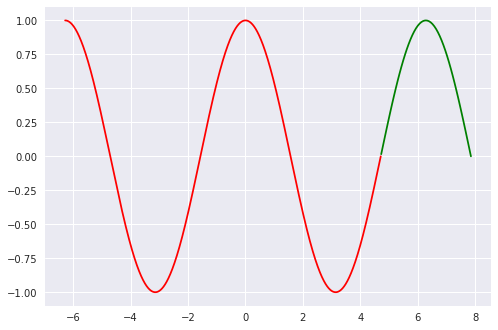

In [35]:
x_train = np.linspace(-2*np.pi, 1.5*np.pi, 10000)
y_train = np.cos(x_train)
x_test = np.linspace(1.505*np.pi, 2.5*np.pi, 50)
y_test = np.cos(x_test)

plt.plot(x_train, y_train, 'r')
plt.plot(x_test, y_test, 'g')

x_train_norm = (x_train - x_train.mean())/x_train.std()
y_train_norm = (y_train - y_train.mean())/y_train.std()
x_test_norm = (x_test - x_test.mean())/x_test.std()
y_test_norm = (y_test - y_test.mean())/y_test.std()

In [22]:
# linear
x0_linear = layers.Input(shape=(1,), dtype='float32') 
x1_linear = layers.Dense(64, activation='selu')(x0_linear) 
x2_linear = layers.Dense(32, activation='selu')(x1_linear)
x3_linear = layers.Dense(16, activation='selu')(x2_linear)
x4_linear = layers.Dense(8, activation='selu')(x3_linear)

# square
x0_square = layers.Input(shape=(1,), dtype='float32')
x1_square = layers.Dense(64, activation='selu')(x0_square)
x2_square = layers.Dense(32, activation='selu')(x1_square)
x3_square = layers.Dense(16, activation='selu')(x2_square)
x4_square = layers.Dense(8, activation='selu')(x3_square)

# cubic
x0_cubic = layers.Input(shape=(1,), dtype='float32')
x1_cubic = layers.Dense(64, activation='selu')(x0_cubic)
x2_cubic = layers.Dense(32, activation='selu')(x1_cubic)
x3_cubic = layers.Dense(16, activation='selu')(x2_cubic)
x4_cubic = layers.Dense(8, activation='selu')(x3_cubic)

# concatenate
x0_conc = layers.concatenate([x4_linear, x4_square, x4_cubic])
x1_conc = layers.Dense(64, activation='selu')(x0_conc) 
x2_conc = layers.Dense(32, activation='selu')(x1_conc)
x3_conc = layers.Dense(16, activation='selu')(x2_conc)
x4_conc = layers.Dense(8, activation='selu')(x3_conc) 
x5_conc = layers.Dense(1, activation='tanh')(x4_conc)

# concatenate
m = models.Model(inputs=[x0_linear, x0_square, x0_cubic], outputs=[x5_conc])

# compile
m.compile(optimizer=optimizers.rmsprop(), loss=losses.mae)

# fitting
data_x = [x_train_norm, x_train_norm**2, x_train_norm**3]
h = m.fit(data_x, [y_train_norm], batch_size=500, epochs=100, validation_split=.2)
# 

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 358us/step - loss: 0.5721 - val_loss: 0.4891
Epoch 2/100
8000/8000 [==============================] - 0s 46us/step - loss: 0.3310 - val_loss: 0.3607
Epoch 3/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.2990 - val_loss: 0.3754
Epoch 4/100
8000/8000 [==============================] - 0s 46us/step - loss: 0.2695 - val_loss: 0.3811
Epoch 5/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.2641 - val_loss: 0.3762
Epoch 6/100
8000/8000 [==============================] - 0s 45us/step - loss: 0.2682 - val_loss: 0.3546
Epoch 7/100
8000/8000 [==============================] - 0s 47us/step - loss: 0.2582 - val_loss: 0.3679
Epoch 8/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.2508 - val_loss: 0.3628
Epoch 9/100
8000/8000 [==============================] - 0s 48us/step - loss: 0.2542 - val_loss: 0.3518
Epoch 10/100
80

dict_keys(['val_loss', 'loss'])


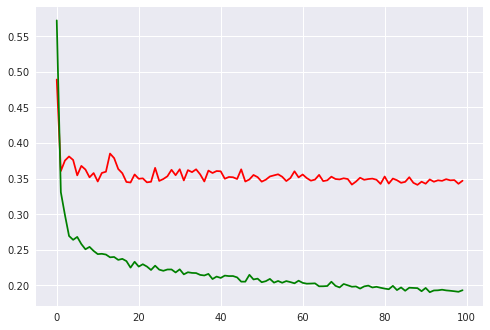

In [32]:
plt.plot(h.history['val_loss'], c='r')
plt.plot(h.history['loss'], c='g')

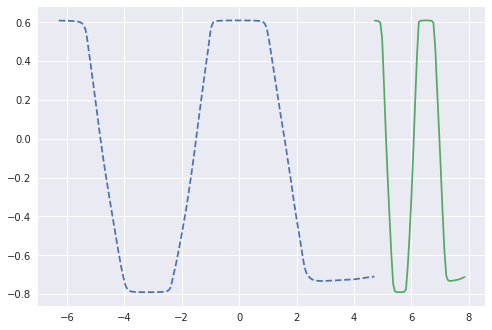

In [39]:
data_x_test = (x_test - x_test.mean())/x_test.std()
data_x_test = [data_x_test, data_x_test**2, data_x_test**3]

plt.plot(x_train, m.predict(data_x) * y_train.std() + y_train.mean(), '--')
plt.plot(x_test, m.predict(data_x_test) * y_train.std() + y_train.mean())